In [1]:
import pandas as pd

In [59]:
df=pd.read_csv('test (1).csv',header=None)
df.shape

(2645, 9)

# 1. Exploration

In [60]:
# get columns name
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

In [61]:
df.rename(columns={0:'y'},inplace=True)

In [62]:
df.columns

Index(['y', 1, 2, 3, 4, 5, 6, 7, 8], dtype='object')

In [63]:
# check missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2645 entries, 0 to 2644
Data columns (total 9 columns):
y    2645 non-null object
1    2512 non-null float64
2    2535 non-null float64
3    2516 non-null float64
4    2525 non-null float64
5    2512 non-null float64
6    2523 non-null float64
7    2518 non-null float64
8    2645 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 186.1+ KB


In [37]:
# explore types of columns
df.dtypes

y     object
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8      int64
dtype: object

In [38]:
# get statistical features
df.describe()

,1,2,3,4,5,6,7,8
count,2512.000000,2535.000000,2516.000000,2525.000000,2512.000000,2523.000000,2518.000000,2645.000000
mean,2.819271,2.202188,0.775461,4.556422,2.019613,1.022179,1.306884,9.734216
std,0.507148,0.430892,0.219097,2.307675,1.079266,0.537118,0.634783,1.917567
min,1.377000,0.994500,0.306000,0.438600,0.155550,0.068850,0.153000,7.000000
25%,2.473500,1.912500,0.637500,2.743800,1.178100,0.600525,0.816000,8.000000
50%,2.856000,2.244000,0.765000,4.317150,1.884450,0.963900,1.267350,10.000000
75%,3.187500,2.499000,0.892500,6.079200,2.710650,1.374450,1.708500,11.000000
max,4.350429,3.561807,2.626500,14.175450,7.588800,3.897332,4.156500,16.000000


In [64]:
# fill missing values with mean
df.fillna(df.mean(),inplace=True)

In [65]:
# check if target variable is well balanced
df['y'].value_counts()

M     1011
F      854
I      650
--     115
?       15
Name: y, dtype: int64

In [66]:
# assign '--' and '?' to label I
df['y']=df.apply(lambda raw: 'I' if raw['y']=='--' or raw['y']=='?' else raw['y'],axis=1)

In [110]:
df['y'].value_counts()

M    1011
F     854
I     780
Name: y, dtype: int64

In [67]:
df.columns

Index(['y', 1, 2, 3, 4, 5, 6, 7, 8], dtype='object')

# 2. Visualization

In [51]:
import matplotlib.pyplot as plt
import seaborn as sb

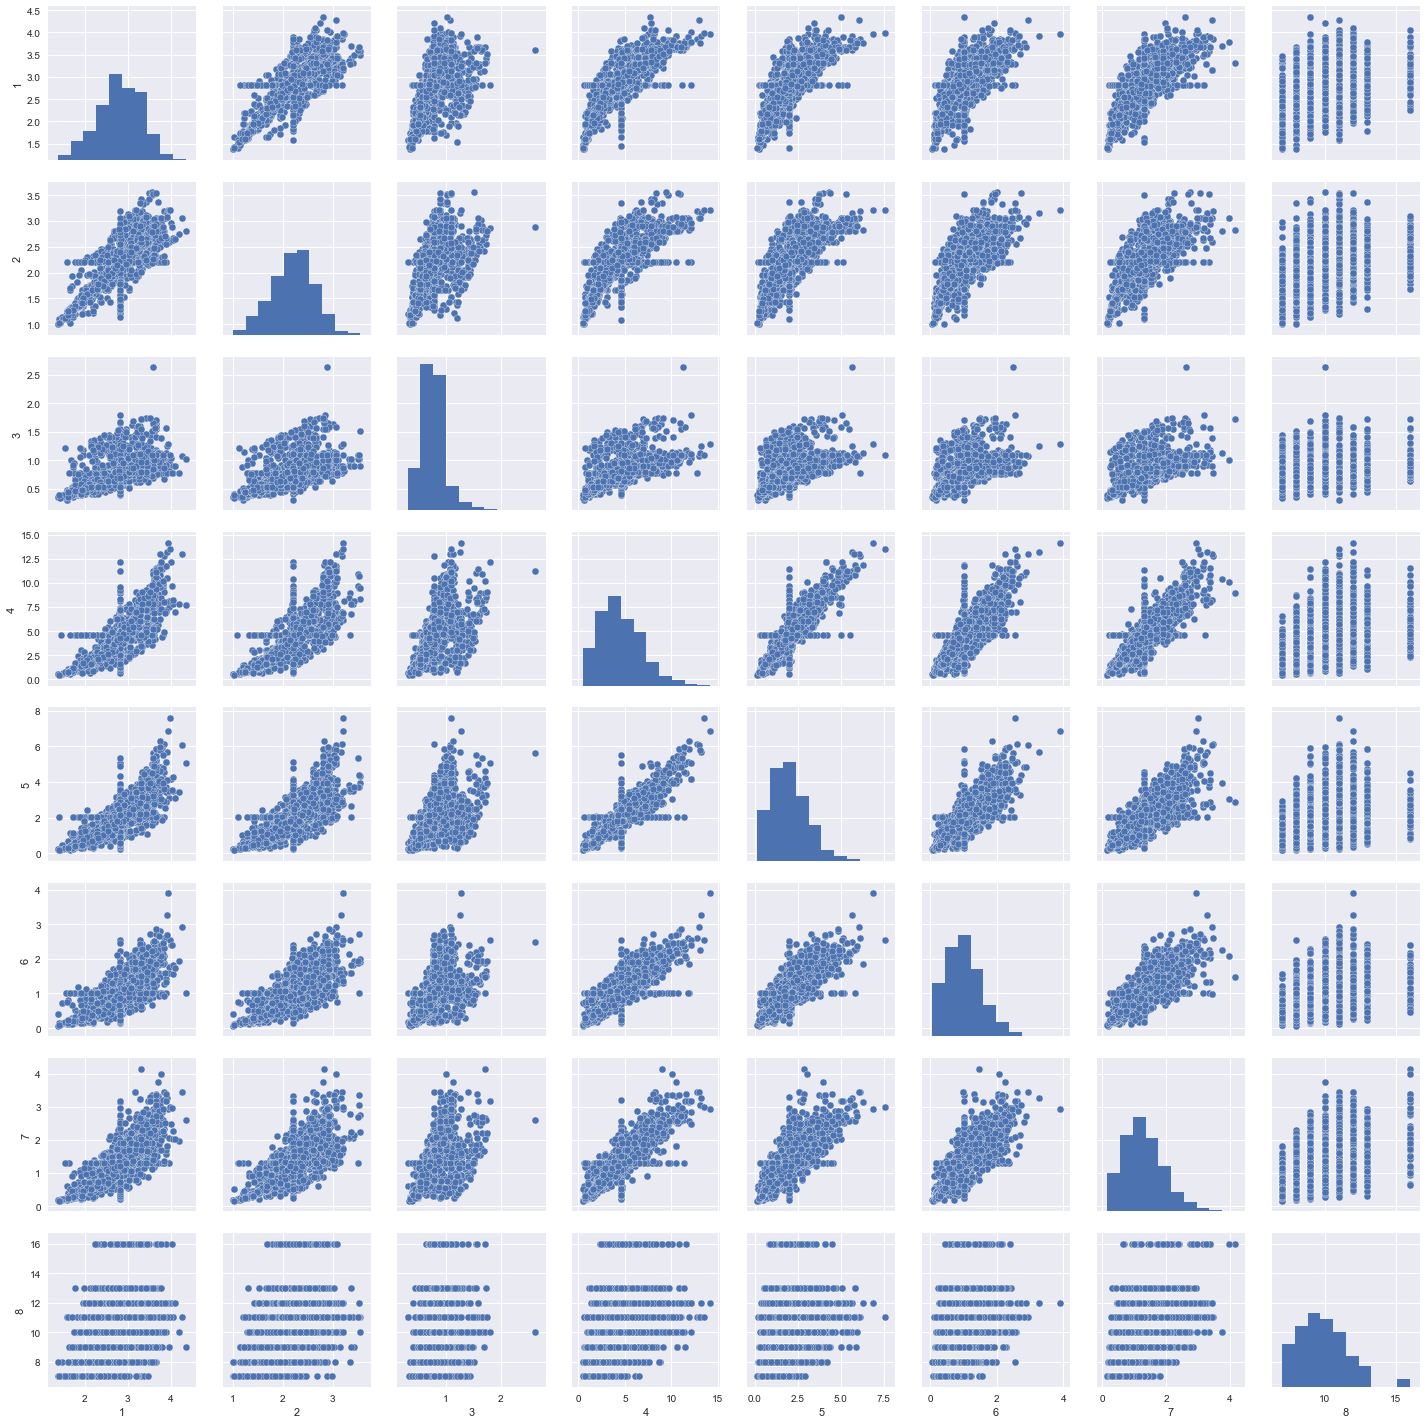

In [68]:
# Explore correlation 
sb.pairplot(df)
plt.show()

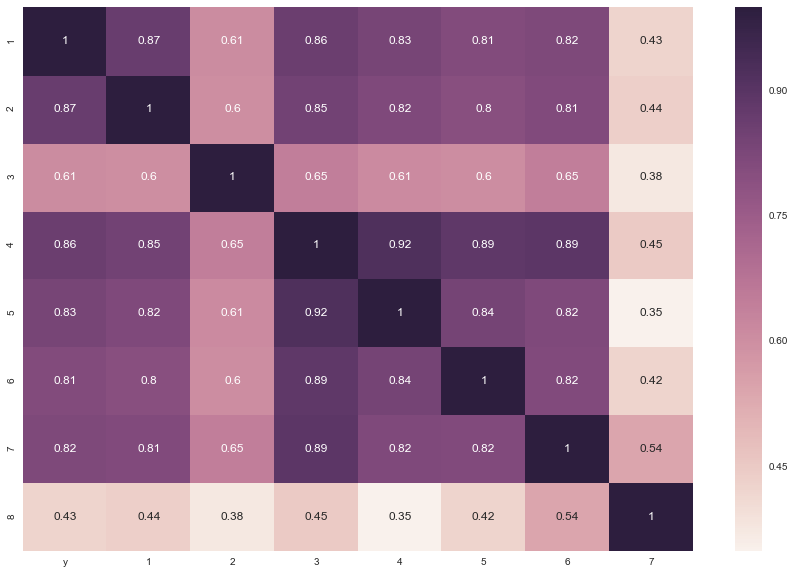

In [75]:
# as result we see some positive correlation between features 4 to 5-7, but some are chaos as 2 and 3. Let's see in digits.
# let's calculate correlation for all features as heatmap
plt.figure(figsize=(15, 10))
sb.heatmap(df.corr(), annot=True,xticklabels='y12345678',yticklabels='y12345678')
plt.show()

In [ ]:
# result: all columns have correlation to the yarget variable. We will use them all further. Min corr=0.43

# 3. Explore outliers

C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

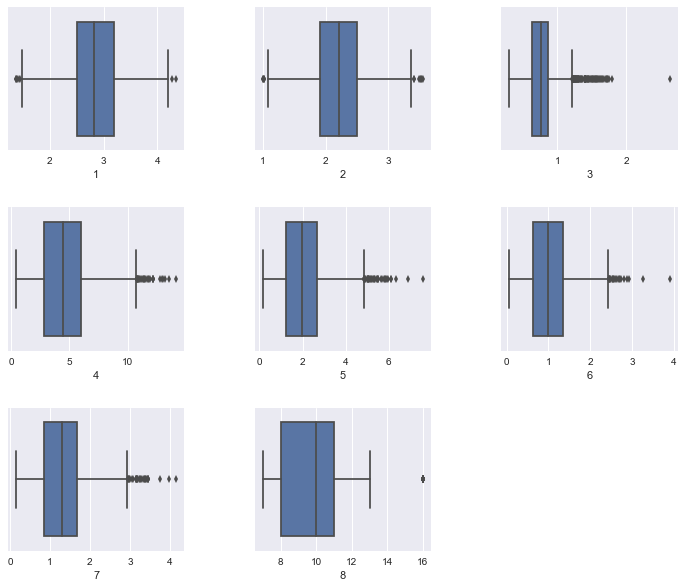

In [81]:
# plot our features as boxplot
fig = plt.figure(figsize=(12,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
columns=df.columns
for i in range(1,9):
    ax = fig.add_subplot(3, 3, i)
    sb.boxplot(x=df[columns[i]])
plt.show()


In [83]:
# we see some outliers in features: 4,5,6,7. Try to remove them
# remove them based on z-score
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df[[1,2,3,4,5,6,7,8]]))
df_ = df[(z < 3).all(axis=1)]
print(df.shape[0] - df_.shape[0])

143


In [ ]:
# we remove 143 outliers

# 4. Split data into train and test and scale feature data

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [85]:
# feature data X
X = df_.values[:,1:]
# target variable y
y = df_.values[:,0]

In [88]:
# scaled data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [91]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=42)

# 5. Train models

In [98]:
from sklearn.multiclass import OneVsRestClassifier


In [93]:
lr=LogisticRegression()
svm_rbf=svm.SVC(kernel='rbf')
svm_linear=svm.LinearSVC()
forest=RandomForestClassifier(n_estimators=50, max_depth=4,random_state=42)
forest_1=RandomForestClassifier(n_estimators=10, max_depth=3,random_state=42)
zoo=dict({'LogisticRegression':lr,'SVM RBF':svm_rbf,'SVM Linear':svm_linear,'Random Forest':forest,'Random Forest_1':forest_1})

In [ ]:
# we can use f1_micro. It prevent from unbalanced data. Our data is quite unbalanced

In [108]:
model_scores=dict()
for name,model in zoo.items():
    scores=cross_val_score(model,X_train,y_train,cv=5,scoring='f1_micro')
    model_scores[name]=scores.mean()

In [109]:
for name,score in model_scores.items():
    print(f"Accuracy for {name} : {score}")

Accuracy for LogisticRegression : 0.5021475708271703
Accuracy for SVM RBF : 0.512805779952213
Accuracy for SVM Linear : 0.4978922516782342
Accuracy for Random Forest : 0.513846854022073
Accuracy for Random Forest_1 : 0.502682330185459


In [113]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [115]:
# train best model
y_=RandomForestClassifier(n_estimators=50, max_depth=4,random_state=42).fit(X_train,y_train).predict(X_test)


In [117]:
from sklearn.metrics import f1_score

In [ ]:
# Final result

In [120]:
f1_score(y_test,y_,average='micro')

0.5159744408945687